## Data Collection

In [1]:
import os

In [2]:
current_dir = os.getcwd()
current_dir

'/workspace/image-manipulation-test'

In [3]:
os.chdir('/workspace/image-manipulation-test')
print("You set a new current directory")

You set a new current directory


In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/image-manipulation-test'

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageChops, ImageEnhance
import numpy as np
import cv2

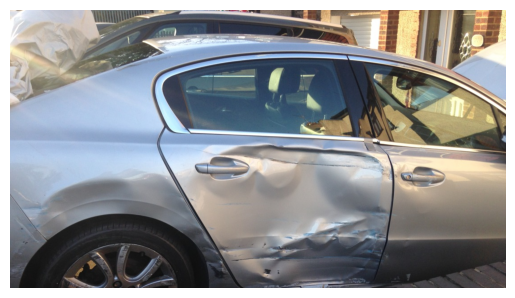

In [6]:
img = mpimg.imread("images/damaged-car.jpg")

plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
from PIL import Image, ImageChops, ImageEnhance
import numpy as np

# Load and save the image with a lower quality to create a base for ELA
img = Image.open("images/damaged-car.jpg")
ela_img = img.copy()
ela_img.save("images/ela_image.jpg", 'JPEG', quality=95)

In [8]:
# Load the saved image and calculate the difference
ela_img = Image.open("images/ela_image.jpg")
diff_img = ImageChops.difference(img, ela_img)

In [9]:
# Enhance the difference image to make it more visible
extrema = diff_img.getextrema()
max_diff = max([ex[1] for ex in extrema])
scale = 255.0 / max_diff if max_diff else 1.0
diff_img = ImageEnhance.Brightness(diff_img).enhance(scale)

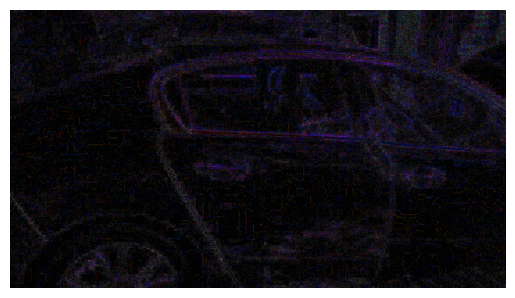

In [10]:
# Display the ELA result
plt.imshow(diff_img)
plt.axis('off')
plt.show()

In [11]:
# Convert the ELA result to grayscale
ela_img_gray = diff_img.convert('L')

In [12]:
# Convert the grayscale image to a numpy array for OpenCV
ela_img_np = np.array(ela_img_gray)

In [13]:
# Apply Canny edge detection
edges = cv2.Canny(ela_img_np, 100, 200)

(-0.5, 1109.5, 622.5, -0.5)

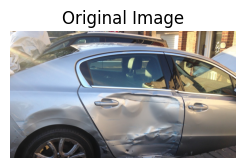

In [14]:
# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

(-0.5, 1109.5, 622.5, -0.5)

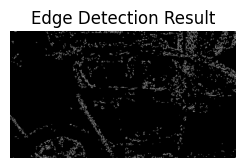

In [15]:
# Display the edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection Result")
plt.axis('off')

In [16]:
plt.show()

In [17]:
from PIL import Image

# Open the image
img = Image.open("images/damaged-car.jpg")

# Extract EXIF data
exif_data = img._getexif()

# Display EXIF data
if exif_data:
    for tag, value in exif_data.items():
        print(f"{tag}: {value}")
else:
    print("No EXIF metadata found.")

No EXIF metadata found.


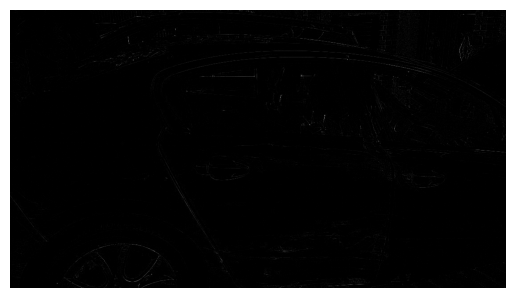

In [18]:
import cv2

# Convert image to grayscale
gray_img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)

# Apply a median filter to the grayscale image
noise_img = cv2.medianBlur(gray_img, 3)

# Subtract the filtered image from the original to get the noise pattern
noise_pattern = cv2.subtract(gray_img, noise_img)

plt.imshow(noise_pattern, cmap='gray')
plt.axis('off')
plt.show()

### Method 2

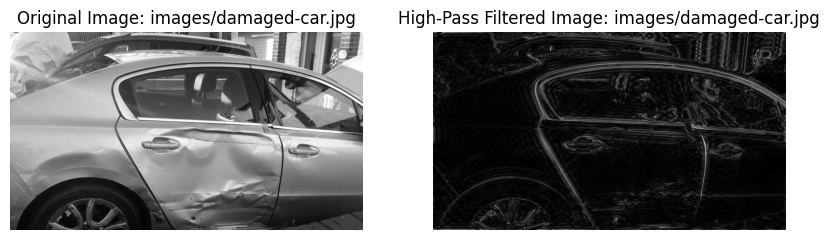

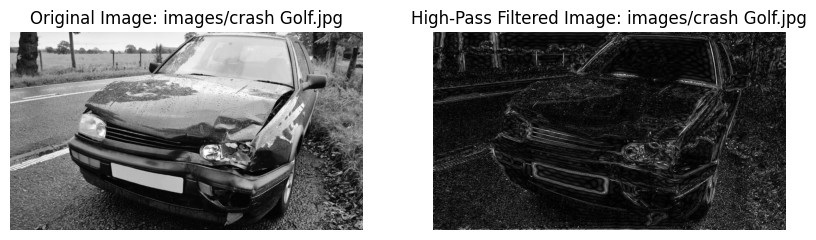

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List of image paths
image_paths = ['images/damaged-car.jpg', 'images/crash Golf.jpg']

# Loop through each image path
for image_path in image_paths:
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Fourier Transform
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)

    # Create a High-Pass Filter
    rows, cols = img.shape
    crow, ccol = rows // 2 , cols // 2

    # Create a mask with a central square of size 30x30 and set it to 0, otherwise 1
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 0

    # Apply the mask and inverse Fourier Transform
    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    # Normalize the image to the range [0, 255]
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)

    # Convert back to uint8
    img_back = np.uint8(img_back)

    # Display the original and high-pass filtered images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Original Image: {image_path}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_back, cmap='gray')
    plt.title(f"High-Pass Filtered Image: {image_path}")
    plt.axis('off')

    plt.show()


### Method 3

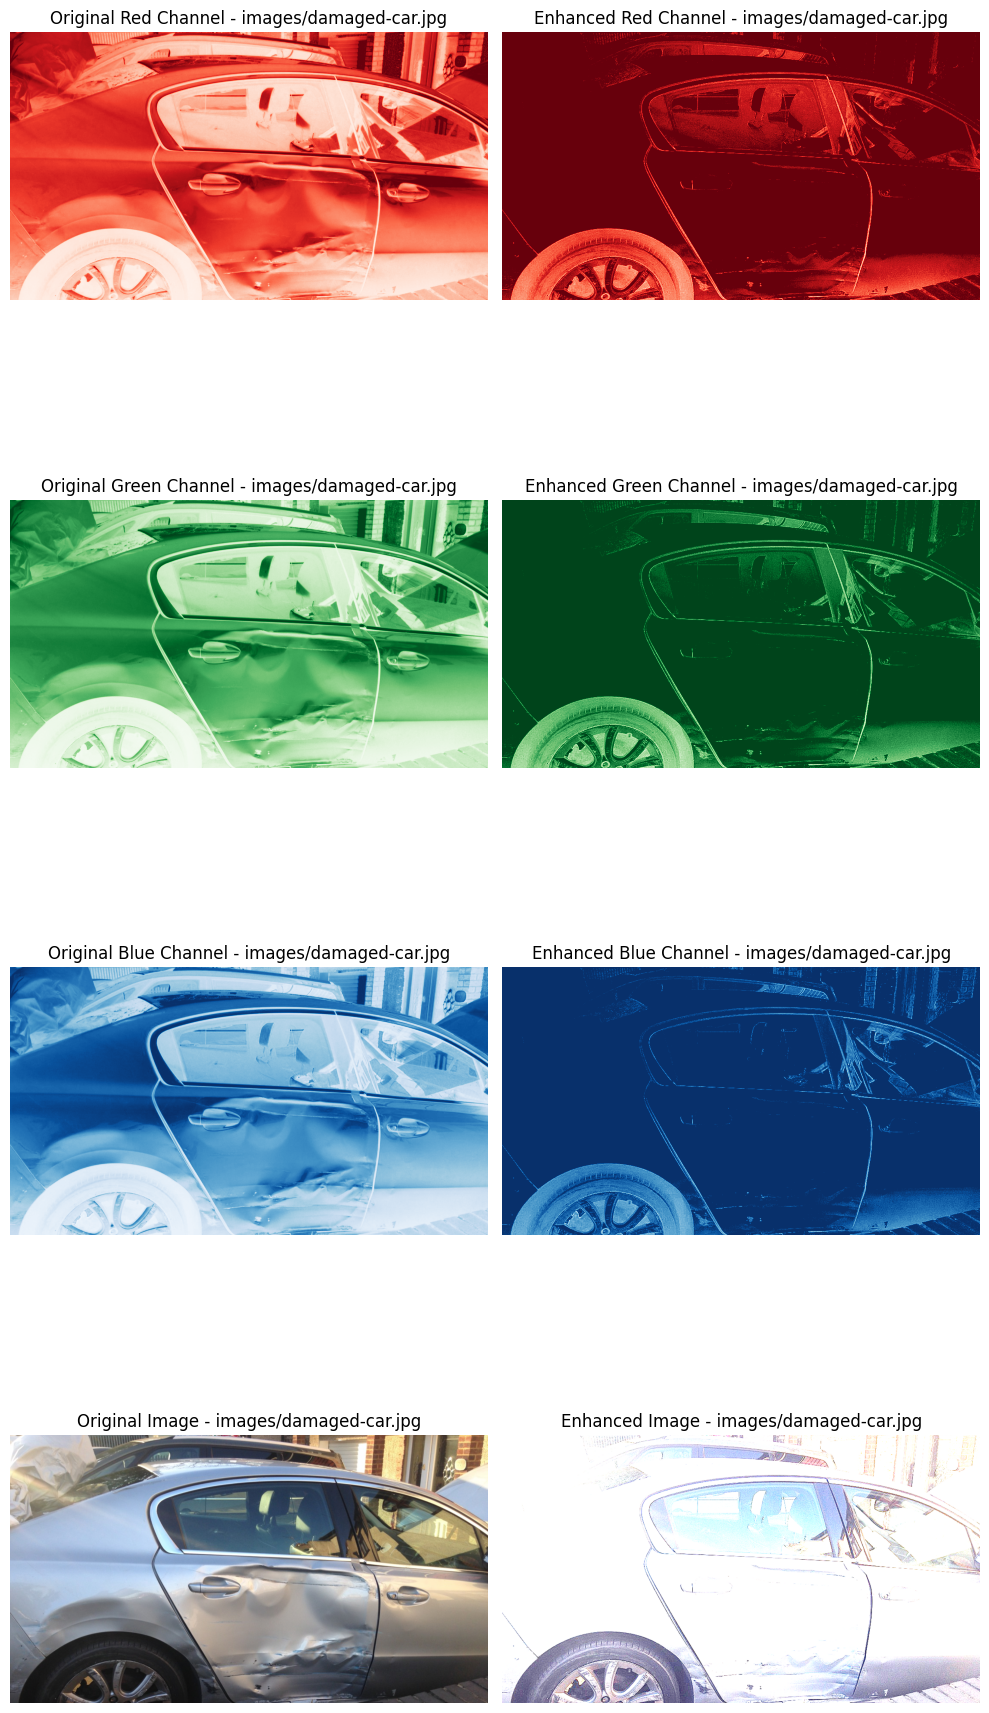

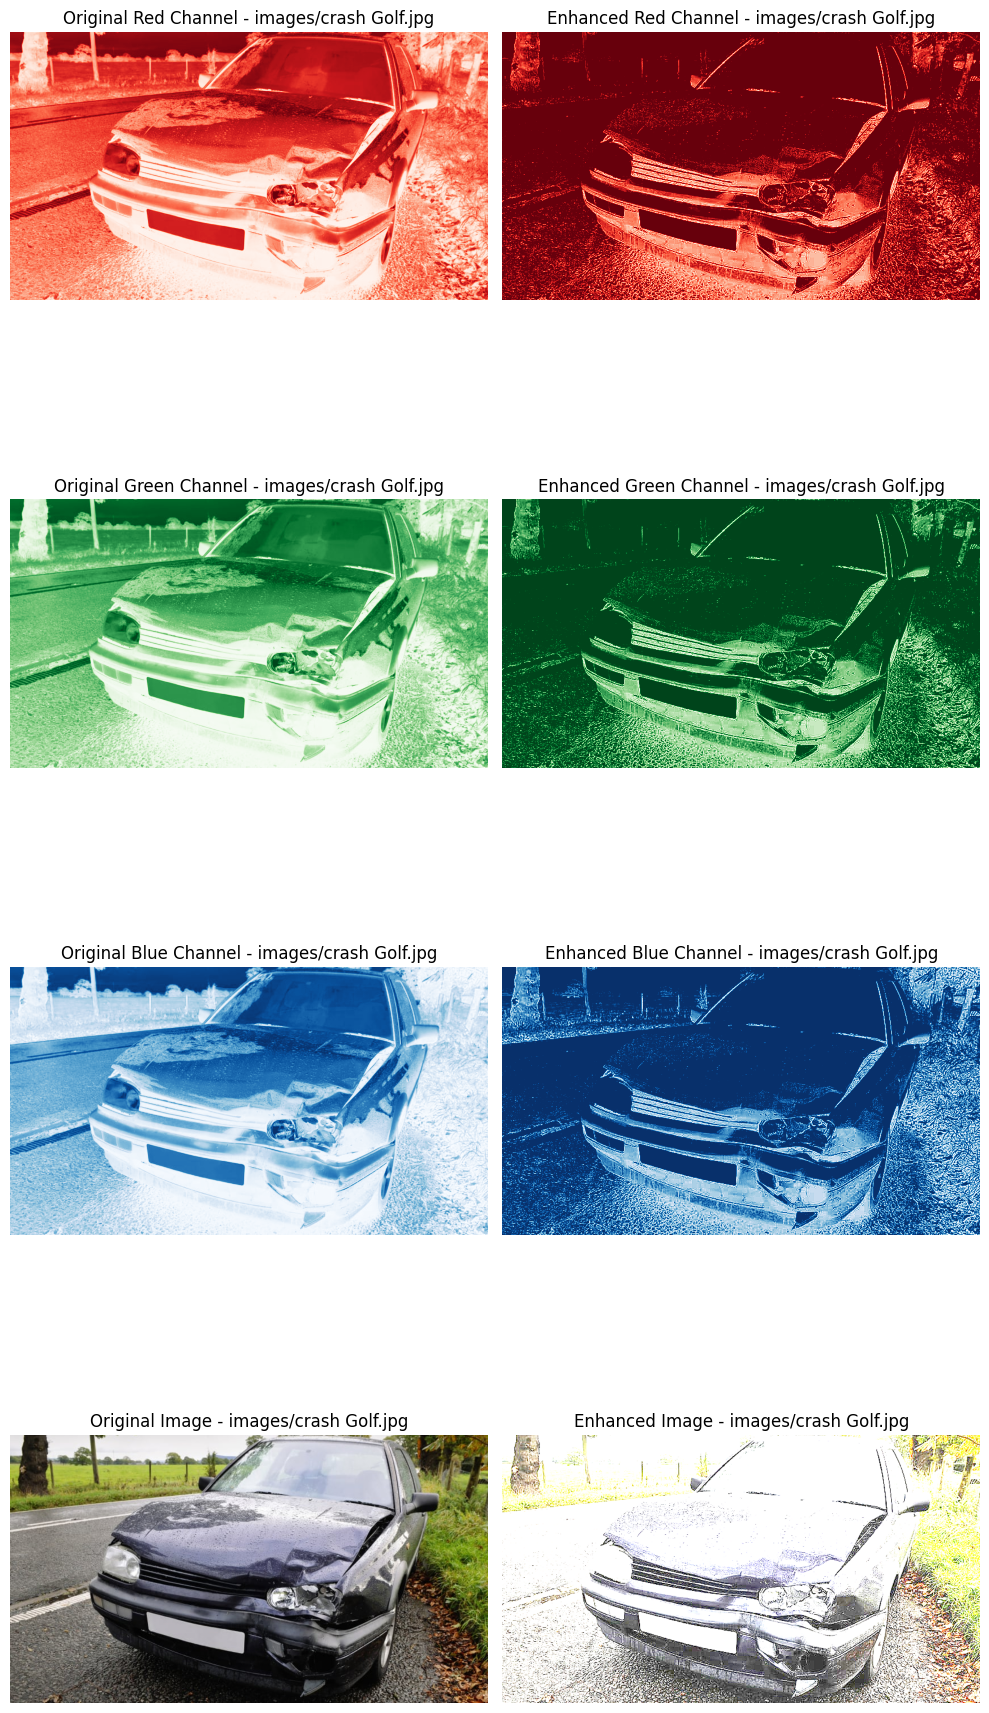

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function for contrast stretching
def contrast_stretching(channel):
    min_val = np.min(channel)
    max_val = np.max(channel)
    stretched = ((channel - min_val) / (max_val - min_val)) * 255
    return np.uint8(stretched)

# Function for gamma correction
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Function for sharpening
def sharpen(image_channel):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(image_channel, -1, kernel)

# Function for increasing contrast
def increase_contrast(image_channel, alpha=1.5, beta=0):
    # Alpha > 1 increases contrast, beta is added to each pixel
    return cv2.convertScaleAbs(image_channel, alpha=alpha, beta=beta)

# List of image paths
image_paths = ["images/damaged-car.jpg", "images/crash Golf.jpg"]

for image_path in image_paths:
    # Load the image using PIL and convert it to OpenCV format
    img_pil = Image.open(image_path)
    img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

    # Split the image into its respective channels
    b_channel, g_channel, r_channel = cv2.split(img)

    # Apply contrast stretching to each channel
    r_stretched = contrast_stretching(r_channel)
    g_stretched = contrast_stretching(g_channel)
    b_stretched = contrast_stretching(b_channel)

    # Apply gamma correction to each channel
    gamma = 2.0  # Increase gamma to enhance the image further
    r_adjusted = adjust_gamma(r_stretched, gamma=gamma)
    g_adjusted = adjust_gamma(g_stretched, gamma=gamma)
    b_adjusted = adjust_gamma(b_stretched, gamma=gamma)

    # Sharpen the image
    r_adjusted = sharpen(r_adjusted)
    g_adjusted = sharpen(g_adjusted)
    b_adjusted = sharpen(b_adjusted)

    # Increase contrast further
    r_adjusted = increase_contrast(r_adjusted, alpha=2.0)
    g_adjusted = increase_contrast(g_adjusted, alpha=2.0)
    b_adjusted = increase_contrast(b_adjusted, alpha=2.0)

    # Merge the channels back into a single image
    adjusted_img = cv2.merge([b_adjusted, g_adjusted, r_adjusted])

    # Plotting the original and adjusted channels alongside the original and adjusted images
    fig, axs = plt.subplots(4, 2, figsize=(10, 20))

    axs[0, 0].imshow(r_channel, cmap='Reds')
    axs[0, 0].set_title(f"Original Red Channel - {image_path}")
    axs[0, 0].axis('off')

    axs[0, 1].imshow(r_adjusted, cmap='Reds')
    axs[0, 1].set_title(f"Enhanced Red Channel - {image_path}")
    axs[0, 1].axis('off')

    axs[1, 0].imshow(g_channel, cmap='Greens')
    axs[1, 0].set_title(f"Original Green Channel - {image_path}")
    axs[1, 0].axis('off')

    axs[1, 1].imshow(g_adjusted, cmap='Greens')
    axs[1, 1].set_title(f"Enhanced Green Channel - {image_path}")
    axs[1, 1].axis('off')

    axs[2, 0].imshow(b_channel, cmap='Blues')
    axs[2, 0].set_title(f"Original Blue Channel - {image_path}")
    axs[2, 0].axis('off')

    axs[2, 1].imshow(b_adjusted, cmap='Blues')
    axs[2, 1].set_title(f"Enhanced Blue Channel - {image_path}")
    axs[2, 1].axis('off')

    axs[3, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[3, 0].set_title(f"Original Image - {image_path}")
    axs[3, 0].axis('off')

    axs[3, 1].imshow(cv2.cvtColor(adjusted_img, cv2.COLOR_BGR2RGB))
    axs[3, 1].set_title(f"Enhanced Image - {image_path}")
    axs[3, 1].axis('off')

    plt.tight_layout()
    plt.show()


In [19]:
# import torch
# from torchvision import models, transforms

# # Load a pretrained model (for example, ResNet)
# model = models.resnet50(pretrained=True)
# model.eval()

# # Prepare the image
# preprocess = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

# input_tensor = preprocess(img)
# input_batch = input_tensor.unsqueeze(0)

# with torch.no_grad():
#     output = model(input_batch)

# # Example output
# print(output)